In [28]:
def decToBin(dec_num): 
    bin_num = ''
    while (dec_num >= 1): 
        bin_num = str(dec_num % 2) + bin_num
        dec_num = dec_num // 2 
    # For case of 0, not strictly needed
    bin_num = '0' + bin_num
    print(bin_num)

decToBin(121)

01111001


In [77]:
import math 
import numpy as np

# For loop version
def madelungConstant(): 
    L = 100

    V = 0 
    for i in range(-L, L): 
        for j in range(-L, L): 
            for k in range(-L, L): 
                if (i == 0 and j == 0 and k == 0): 
                    continue
                if ((i + j + k)) % 2 == 0: 
                    V -= 1 / math.sqrt( i**2 + j**2 + k**2) 
                else: 
                    V += 1 / math.sqrt( i**2 + j**2 + k**2) 
    print (V)
    
mid = L

# Optimised Version 
def madelungConstantTwo(): 
    L = 100
    mid = L
    L = 2*L 
    A = np.fromfunction(f,(L, L, L))
    A[mid][mid][mid] = 0
    print(np.sum(A))
    
madelungConstant()
madelungConstantTwo()

def f(i, j, k):
    # Make correct range
    # Else will only sum in the first octant (no negative values)  
    i = mid - i
    j = mid - j
    k = mid - k
    return np.power(-1, (np.absolute(i) + np.absolute(j) + np.absolute(k)) + 1)/ np.sqrt(np.power(i, 2) + np.power(j, 2) + np.power(k , 2)) 

1.7475645950377328
1.7475645950341998


In [73]:
%timeit madelungConstant()

1.7475645950377328
1.7475645950377328
1.7475645950377328
1.7475645950377328
1.7475645950377328
1.7475645950377328
1.7475645950377328
1.7475645950377328
7.87 s ± 556 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [78]:
%timeit madelungConstantTwo()

1.7475645950341998
1.747564595034225


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide


1.7475645950341998
1.7475645950341998
1.7475645950341998
1.747564595034225
1.7475645950341998
1.7475645950341998
813 ms ± 25.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


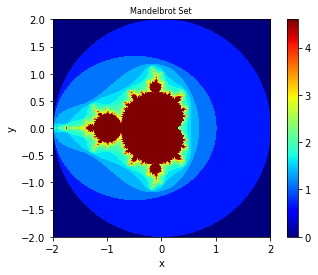

In [148]:
import numpy as np 
import math

points = []
# Mandelbrot function definition
def function(z, c): 
    original = c
    for i in range(1, 100): 
        z = z ** 2 + c
        if math.sqrt(z.real **2 + z.imag ** 2) > 2:
            # Log to make details more distinct
            points.append(math.log(i)) 
            return 
    points.append(math.log(99))

import matplotlib.pyplot as plt
import time
from pylab import imshow, hot, jet

def mandlebrot(): 
  
    N = 1000

    # Establish range of values from -2 to 2 
    x = np.linspace(-2, 2, N)
    y = np.linspace(-2, 2, N) 
    x, y = np.meshgrid(x, y)
    # Generate all c values that will be inputted
    c = x + 1j * y
    # Vectorize for optimisation
    vector_func = np.vectorize(function)
    vector_func(0, c)
    
    # Make it the correct size 
    del points[-1]
    image = np.reshape(np.array(points), (N, N))
    
    jet()
    plt.imshow(image, extent = [-2 , 2, -2 , 2])
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Mandelbrot Set', fontsize=8)
    plt.savefig('mand.png')

mandlebrot()    

In [27]:
def quad1(a, b, c):
    
    x1 = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
    x2 = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
    
    return x1, x2

def quad2(a, b, c):
    
    x1 = (2*c) / (-b - np.sqrt(b**2 - 4*a*c))
    x2 = (2*c) / (-b + np.sqrt(b**2 - 4*a*c))

    return x1, x2

def quad3(a, b, c): 
    x1 = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
    x2 = (2*c) / (-b - np.sqrt(b**2 - 4*a*c))
    return x1, x2 
    
# caused by b

print(quad1(0.001, 1000, 0.001))
print(quad2(0.001, 1000, 0.001))
print(quad3(0.001, 1000, 0.001))


(-9.999894245993346e-07, -999999.999999)
(-1.000000000001e-06, -1000010.5755125057)
(-999999.999999, -1.000000000001e-06)
